In [9]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [ ]:
workspace = os.path.dirname(os.getcwd())

nlcd_path = f"{workspace}/data/nlcd/resampled_nlcd_2016_cropped.tif"
nlcd = xr.open_dataarray(nlcd_path)

nlcd_classes = {
    11: 'Open Water',
    12: 'Perennial Ice/Snow',
    21: 'Developed, Open Space',
    22: 'Developed, Low Intensity',
    23: 'Developed, Medium Intensity',
    24: 'Developed, High Intensity',
    31: 'Barren Land (Rock/Sand/Clay)',
    41: 'Deciduous Forest',
    42: 'Evergreen Forest',
    43: 'Mixed Forest',
    52: 'Shrub/Scrub',
    71: 'Grassland/Herbaceous',
    72: 'Sedge/Herbaceous',
    73: 'Lichens',
    74: 'Moss',
    81: 'Pasture/Hay',
    82: 'Cultivated Crops',
    90: 'Woody Wetlands',
    95: 'Emergent Herbaceous Wetlands'
}

nlcd_classified = np.vectorize(nlcd_classes.get)(nlcd.values)

nlcd_classified_df = pd.DataFrame(nlcd_classified.flatten(), columns=['Land Cover Class'])

In [ ]:
category_counts = nlcd_classified_df['Land Cover Class'].value_counts()
print(category_counts)

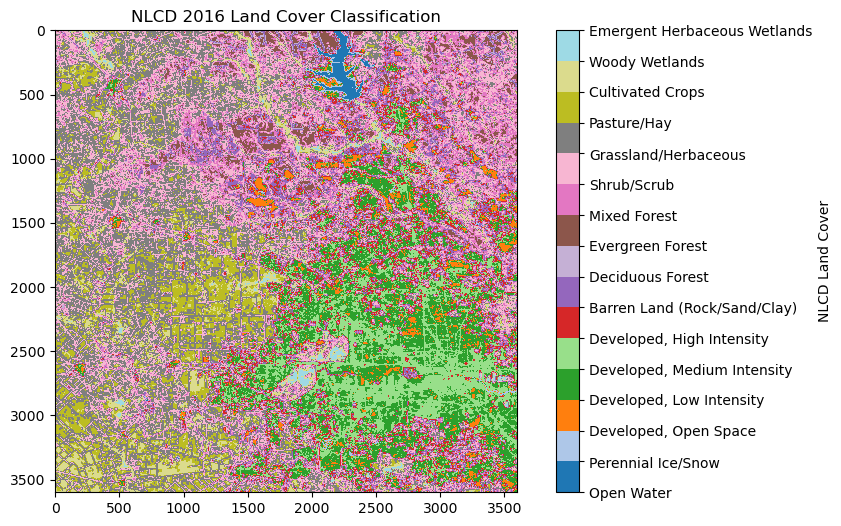

In [15]:

# Define a colormap and normalization based on the NLCD categories
cmap = plt.get_cmap('tab20', len(nlcd_classes))
norm = mcolors.BoundaryNorm(list(nlcd_classes.keys()), cmap.N)

plt.figure(figsize=(10, 6))
img = plt.imshow(nlcd.isel(band=0), cmap=cmap, norm=norm)

# Add a colorbar with the tick labels for NLCD categories
cbar = plt.colorbar(img, ticks=list(nlcd_classes.keys()), label='NLCD Land Cover')

# Set the colorbar tick labels to the class names
cbar.ax.set_yticklabels([nlcd_classes[key] for key in nlcd_classes.keys()])

plt.title('NLCD 2016 Land Cover Classification')
plt.show()